In [8]:
#from google.colab import drive
#drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#zip_path = '/content/drive/My Drive/DST Assessment 5/SOCOFing.zip'
#extract_to = '/content/drive/My Drive/DST Assessment 5/SOCOFing'

#!unzip -uq '/content/drive/My Drive/DST Assessment 5/SOCOFing.zip' -d '/content/drive/My Drive/DST Assessment 5/SOCOFing'

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import time

import os
import cv2
import random

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split

In [8]:
def extract_label(img_path,train = True):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    subject_id, etc = filename.split('__')
    
    if train:
        gender, lr, finger, _, _ = etc.split('_')
    else:
        gender, lr, finger, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr == 'Left' else 1

    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

In [9]:
# Very likely need to change label[3] so that we have more features.

img_size = 96

def loading_data(path,train):
    print("loading data from: ",path)
    data = []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (img_size, img_size))
            label = extract_label(os.path.join(path, img),train)
            data.append([label, img_resize ])
        except Exception as e:
            pass
    data
    return data

In [13]:
time_start = time.time()

Real_path = "SOCOFing/Real"
Easy_path = "SOCOFing/Altered/Altered-Easy"
Medium_path = "SOCOFing/Altered/Altered-Medium"
Hard_path = "SOCOFing/Altered/Altered-Hard"


Easy_data = loading_data(Easy_path, train = True)
Medium_data = loading_data(Medium_path, train = True)
Hard_data = loading_data(Hard_path, train = True)
test = loading_data(Real_path, train = False)

data = np.concatenate([Easy_data, Medium_data, Hard_data], axis=0)

del Easy_data, Medium_data, Hard_data

time.time()-time_start

loading data from:  SOCOFing/Altered/Altered-Easy
loading data from:  SOCOFing/Altered/Altered-Medium
loading data from:  SOCOFing/Altered/Altered-Hard
loading data from:  SOCOFing/Real


4.791997909545898

In [73]:
#Let's take a quick look at this, we have the subject_id, gender, lr, finger.
#Here, for each data point, [1] contains the image and [0] contains the list of features.
#Now we can choose what we want to recognise


test_df2 = pd.DataFrame(test, columns = ['labels', 'image'])
test_df = pd.DataFrame(test_df2.labels.tolist(), columns=['id', 'gender', 'lr', 'finger'], index= test_df2.index)
test_df['image'] = df2['image']
display(test_df)

train_df2 = pd.DataFrame(data, columns = ['labels', 'image'])
train_df = pd.DataFrame(train_df2.labels.tolist(), columns=['id', 'gender', 'lr', 'finger'], index= train_df2.index)
train_df['image'] = train_df2['image']
display(train_df)

,id,gender,lr,finger,image
0,364,0,1,4,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
1,292,0,0,4,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
2,53,0,0,0,"[[117, 114, 114, 111, 111, 111, 111, 111, 111,..."
3,225,0,0,4,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
4,277,0,1,2,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
...,...,...,...,...,...
5995,440,0,0,0,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
5996,43,1,1,3,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
5997,303,1,1,1,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
5998,102,0,1,3,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."


,id,gender,lr,finger,image
0,247,0,0,1,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
1,242,0,0,4,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
2,128,0,0,2,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
3,202,0,0,1,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
4,465,1,1,1,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
...,...,...,...,...,...
49265,493,0,1,4,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
49266,52,0,1,4,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
49267,2,1,0,4,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."
49268,165,0,0,2,"[[160, 158, 158, 158, 158, 158, 158, 158, 158,..."


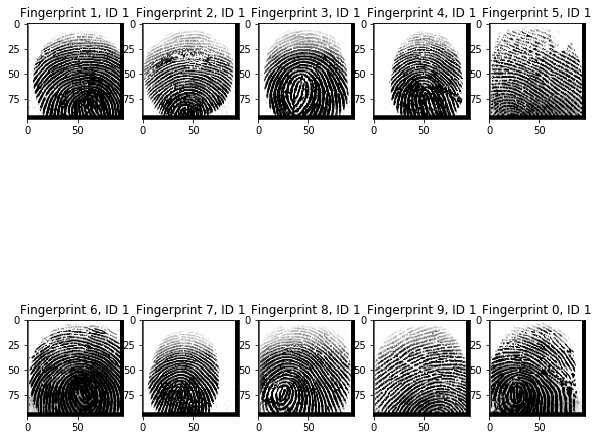

In [72]:
dfid1 = test_df[test_df['id']==1]
dfid1

plt.figure(figsize=[10,10])

for i in range(len(dfid1)):
    position = ('25' + str(i))
    
    plt.subplot(position)
    plt.imshow(dfid1['image'].iloc[i], cmap='gray')
    plt.title('Fingerprint ' + str(i) + ', ID ' + str(1))

Let's see if we can determine using our training data, which hand was used to take the fingerprints. We will train on the training set, and then use our test set for measuring. We will need to make sure that we only take the 'finger' labels from our data. Since the images are grayscale we will normalise them by dividing by 255. We will use the np reshape command to turn our images from vectors into matrices.

In [79]:
test_lrdf = test_df.drop(['id', 'gender', 'finger'], axis = 1)
test_lr = test_lrdf.to_numpy()

train_lrdf = train_df.drop(['id', 'gender', 'finger'], axis = 1)
train_lr = train_lrdf.to_numpy()

In [80]:
#can del data after running this to free up space.
img_size = 96
X, y = [], []

for label, feature in train_lr:
    X.append(feature)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0

y = to_categorical(y, num_classes = 2)

In [81]:
#can del test after running this to free up space.
img_size = 96
X_test, y_test = [], []

for label, feature in test_lr:
    X_test.append(feature)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
X_test = X_test / 255.0

y_test = to_categorical(y_test, num_classes = 2)

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [84]:
X_train

array([[[[0.62745098],
         [0.61960784],
         [0.61960784],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.62745098],
         [0.41176471],
         [0.4745098 ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.62745098],
         [0.41176471],
         [1.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.62745098],
         [0.61960784],
         [0.61